In [5]:
import pandas as pd

df = pd.read_csv("simulation_results.csv")

print(len(df))

df = df.dropna()

print(len(df))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
df = df.sort_values(by='P_Core.1', ascending=False)

df

19420
19138


,N1,N2,N1_layer,N2_layer,per,w1,l1,l2,l2_gap,h1,h1_gap,h2_gap,N1_height_ratio,N1_fill_factor,N1_coil_diameter,N1_coil_zgap,N2_height_ratio,N2_fill_factor,N2_coil_diameter,N2_coil_zgap,N1_space_w,N1_space_l,N2_space_w,N2_space_l,N1_layer_gap,N2_layer_gap,N1_offset_ratio,N2_offset_ratio,N1_offset,N2_offset,cold_plate_x,cold_plate_y,cold_plate_z1,cold_plate_z2,mold_thick,thermal_conductivity,LTx,LRx,M,k,Lmt,Lmr,Llt,Llr,P_winding1,P_winding2,P_Core,B_mean_leg_left,B_mean_leg_right,B_mean_leg_top,B_mean_leg_bottom,Pass Number,Tetrahedra,Total Energy,Energy Error,Delta Energy,LTx.1,LRx.1,M.1,k.1,Lmt.1,Lmr.1,Llt.1,Llr.1,P_winding1.1,P_winding2.1,P_Core.1,B_mean_leg_left.1,B_mean_leg_right.1,B_mean_leg_top.1,B_mean_leg_bottom.1,Pass Number.1,Tetrahedra.1,Total Energy.1,Energy Error.1,Delta Energy.1,Temp_max_core,Temp_mean_core,Temp_max_winding1,Temp_mean_winding1,Temp_max_winding2,Temp_mean_winding2,Temp_max_leg_left,Temp_max_leg_right,Temp_max_leg_top,Temp_max_leg_bottom,Temp_mean_leg_left,Temp_mean_leg_right,Temp_mean_leg_top,Temp_mean_leg_bottom
12271,10,10,1,2,11537,298.0,31.3,113.057085,42.0,139.0,20.516400,13.94170,0.64,0.91,7.359418,0.800640,0.41,0.70,6.648833,3.419400,18.1,25.9,5.2,5.1,5.8,2.2,-0.18,0.66,-4.503600,27.06330,8.3,7.9,19.8,0.11,17.2,1.23,2110.290287,2120.508318,2058.978496,0.973331,1999.234057,2008.914354,111.056230,111.593964,857.784197,865.321438,1.094288e+06,8.196169,8.207306,8.226491,8.115285,2,65705,70.54700,2.1909,1.14010,2110.290287,2120.508318,2058.978496,0.973331,1999.234057,2008.914354,111.056230,111.593964,857.784197,865.321438,1.094288e+06,8.197414,8.208557,8.227744,8.116523,2,65705,70.547000,2.19090,1.14010,53.677850,51.525479,51.770776,51.587269,49.999994,49.999994,52.985742,53.677850,50.766262,50.768507,52.792079,53.401640,50.491427,50.490680
17614,10,10,2,2,10158,263.0,24.5,127.848910,8.6,131.7,1.949160,9.90384,0.92,0.78,15.751320,5.331216,0.53,0.81,9.423135,2.652438,9.4,28.0,26.7,23.5,4.5,2.9,0.63,0.68,3.318840,21.04566,15.2,21.3,35.3,0.38,10.0,0.53,1449.601862,1459.366268,1423.666005,0.978817,1388.839072,1398.194185,60.762790,61.172083,889.741018,820.662842,7.604057e+05,8.173075,8.185467,8.167852,8.157108,2,73124,48.64100,1.4709,1.90870,1449.601862,1459.366268,1423.666005,0.978817,1388.839072,1398.194185,60.762790,61.172083,889.741018,820.662842,7.604057e+05,8.174320,8.186711,8.169091,8.158353,2,73124,48.641000,1.47090,1.90870,56.650690,52.623567,52.562921,51.885740,49.999994,49.999994,56.650690,56.120142,51.062448,51.103426,56.208878,55.836304,50.667891,50.697539
4013,10,10,1,2,29094,197.6,25.7,107.580851,20.3,142.8,4.305420,35.58576,0.91,0.86,10.159571,1.819272,0.44,0.87,9.110640,1.633632,6.8,27.4,11.5,8.8,8.1,7.0,-0.33,0.11,-2.120580,4.39824,15.0,19.1,24.1,0.45,15.7,1.86,1175.508311,1183.060008,1149.302153,0.974581,1116.507557,1123.680222,59.000754,59.379786,609.365856,648.572099,6.218360e+05,8.396672,8.433632,8.356750,8.385127,2,62640,39.35300,1.6567,0.83593,1175.508311,1183.060008,1149.302153,0.974581,1116.507557,1123.680222,59.000754,59.379786,609.365856,648.572099,6.218360e+05,8.397943,8.434908,8.358023,8.386406,2,62640,39.353000,1.65670,0.83593,61.887415,54.523362,54.709894,53.963463,49.999994,49.999994,58.065057,61.887415,52.382557,52.310557,57.392911,61.321815,51.372027,51.326563
15851,10,10,2,2,27179,227.1,22.3,150.591570,48.0,122.9,10.065510,22.42925,0.79,0.81,13.107285,3.689458,0.50,0.78,7.988500,2.703800,13.7,4.0,21.3,24.0,3.2,5.2,0.22,0.27,2.838990,8.29575,29.9,28.9,26.9,0.30,24.0,0.70,1102.705670,1108.774988,1069.452690,0.967186,1031.524943,1037.202481,71.180726,71.572507,660.883168,720.914530,5.681083e+05,7.873405,7.859735,7.829686,7.807560,2,62650,36.76100,1.8546,1.41320,1102.705670,1108.774988,1069.452690,0.967186,1031.524943,1037.202481,71.180726,71.572507,660.883168,720.914530,5.681083e+05,7.874593,7.860931,7.830877,7.808750,2,62650,36.761000,1.85460,1.41320,60.320032,53.573311,55.653650,54.363726,49.999994,49.999994,57.511682,60.320032,51.457512,51.465779,57.274111,59.984335

In [6]:
input_parameter_columns = ["N1", "N2", "N1_layer", "N2_layer", "per", "w1", "l1", "l2", "l2_gap", "h1", "h1_gap", "h2_gap", "N1_height_ratio", "N1_fill_factor", "N1_coil_diameter", "N1_coil_zgap", "N2_height_ratio", "N2_fill_factor", "N2_coil_diameter", "N2_coil_zgap", "N1_space_w", "N1_space_l", "N2_space_w", "N2_space_l", "N1_layer_gap", "N2_layer_gap", "N1_offset_ratio", "N2_offset_ratio", "N1_offset", "N2_offset", "cold_plate_x", "cold_plate_y", "cold_plate_z1", "cold_plate_z2", "mold_thick", "thermal_conductivity"]
output_parameter_columns = ["Lmt", "Llt", "Lmt.1", "Llt.1", "P_winding1", "P_winding2", "P_Core.1", "B_mean_leg_left.1", "B_mean_leg_right.1", "B_mean_leg_top.1", "B_mean_leg_bottom.1",
                            "Temp_max_core", "Temp_mean_core", "Temp_max_leg_left", "Temp_max_leg_right", "Temp_max_leg_top", "Temp_max_leg_bottom"]
output_parameter_name = ["Lmt1", "Llt1", "Lmt2", "Llt2", "P_winding1", "P_winding2", "P_core", "B_mean_leg_left", "B_mean_leg_right", "B_mean_leg_top", "B_mean_leg_bottom",
                         "Temp_max_core", "Temp_mean_core", "Temp_max_leg_left", "Temp_max_leg_right", "Temp_max_leg_top", "Temp_max_leg_bottom"]

for output_parameter, output_parameter_name in zip(output_parameter_columns, output_parameter_name):

    input = df[input_parameter_columns]
    output = df[output_parameter]
    output = output.rename(output_parameter_name)

    data = pd.concat([input, output], axis=1)

    # 데이터 이상치 제거
    outlier_constant = 1.5  # IQR에 곱해질 상수 (조정 가능) (default : 1.5)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # IQR 방식으로 이상치 제거
    data_filtered = data[~((data < (Q1 - outlier_constant * IQR)) | (data > (Q3 + outlier_constant * IQR))).any(axis=1)]

    print("원본 데이터 크기:", len(data))
    print("이상치 제거 후 데이터 크기:", len(data_filtered))

    # 필터링된 데이터로 업데이트
    data = data_filtered

    data.to_csv(f"data_{output_parameter_name}.csv", index=False)



원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14045
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14499
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14046
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14502
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14269
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14303
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13941
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14081
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14089
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14084
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 14086
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13648
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13671
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13633
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13649
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13579
원본 데이터 크기: 19138
이상치 제거 후 데이터 크기: 13589


원본 데이터 크기: 19115
이상치 제거 후 데이터 크기: 13631


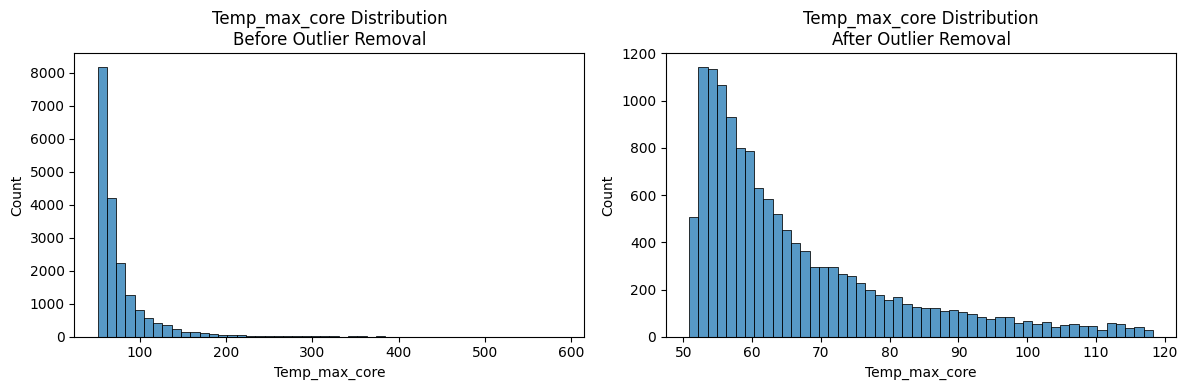

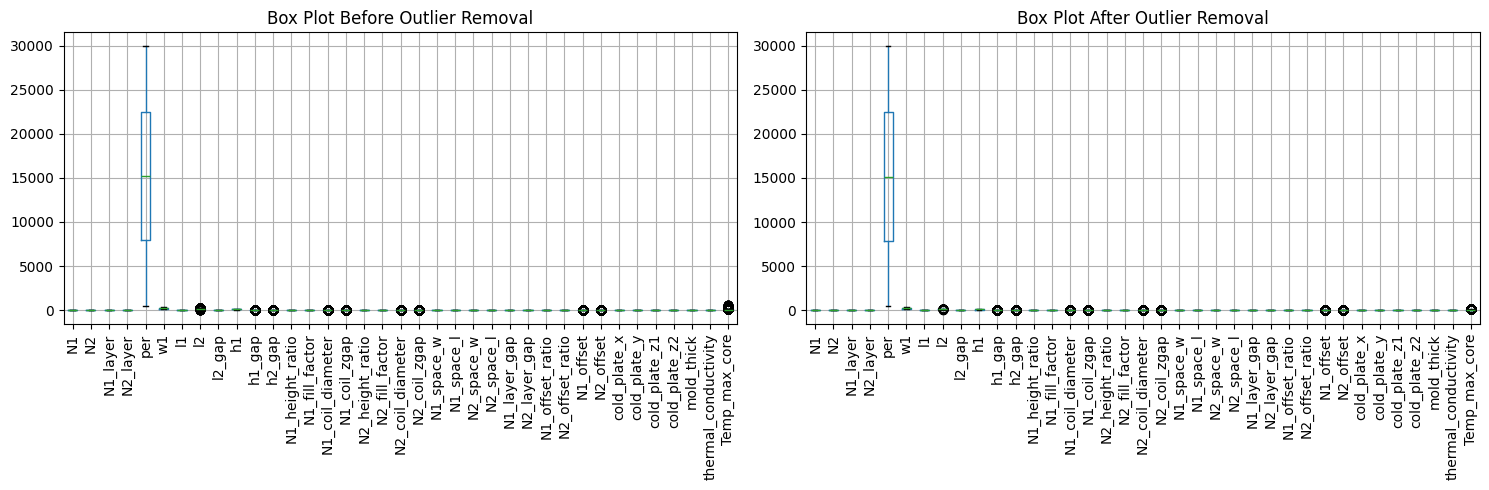

,N1,N2,N1_layer,N2_layer,per,w1,l1,l2,l2_gap,h1,h1_gap,h2_gap,N1_height_ratio,N1_fill_factor,N1_coil_diameter,N1_coil_zgap,N2_height_ratio,N2_fill_factor,N2_coil_diameter,N2_coil_zgap,N1_space_w,N1_space_l,N2_space_w,N2_space_l,N1_layer_gap,N2_layer_gap,N1_offset_ratio,N2_offset_ratio,N1_offset,N2_offset,cold_plate_x,cold_plate_y,cold_plate_z1,cold_plate_z2,mold_thick,thermal_conductivity,Temp_max_core
15851,10,10,2,2,27179,227.1,22.3,150.591570,48.0,122.9,10.065510,22.42925,0.79,0.81,13.107285,3.689458,0.50,0.78,7.988500,2.703800,13.7,4.0,21.3,24.0,3.2,5.2,0.22,0.27,2.838990,8.29575,29.9,28.9,26.9,0.30,24.0,0.70,60.320032
8540,5,5,2,2,24695,187.5,16.7,151.474280,49.3,59.6,7.047700,7.27120,0.57,0.78,6.624540,2.491280,0.60,0.79,7.062600,2.503200,8.6,16.0,17.7,25.9,1.7,7.1,0.45,0.39,5.766300,4.64880,0.0,17.1,21.5,0.37,24.1,0.79,112.892419
9144,5,5,2,2,17251,153.3,21.4,166.536100,43.9,60.1,1.502500,0.77529,0.95,0.86,12.275425,2.664433,0.94,0.75,10.592625,4.707833,9.9,10.0,16.5,25.9,6.2,6.2,0.00,-0.57,0.000000,-1.02771,11.2,24.5,21.1,0.47,28.6,1.88,111.692041
19295,5,5,2,2,29583,244.7,17.4,180.625340,35.9,110.1,24.277050,5.06460,0.51,0.68,9.545670,5.989440,0.80,0.85,18.717000,4.404000,23.4,17.9,24.8,26.7,3.6,3.1,-0.10,-0.54,-2.697450,-5.94540,23.6,5.3,32.3,0.17,36.9,0.62,111.901514
17206,5,5,2,1,26977,199.2,18.9,158.788713,48.4,78.1,6.794700,18.72057,0.42,0.80,6.560400,2.186800,0.49,0.92,5.867913,0.612304,18.7,29.5,7.7,17.8,7.6,2.2,-0.70,-0.06,-15.854300,-1.19493,19.4,9.8,46.9,0.23,36.5,0.62,111.056665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,8,8,2,1,29916,317.7,22.1,103.965488,29.5,123.3,11.738160,13.29174,0.72,0.67,11.895984,7.324020,0.72,0.93,9.173520,0.776790,12.7,10.0,19.4,10.2,8.5,9.0,0.32,-0.23,5.523840,-3.97026,11.6,21.1,40.9,0.21,12.8,1.05,58.931146
1127,7,7,1,1,21141,167.7,39.6,113.121154,16.4,109.3,8.525400,9.39980,0.61,0.71,5.917229,2.762167,0.60,0.83,6.803925,1.592657,14.1,24.9,12.8,20.8,8.5,2.7,0.60,-0.57,12.788100,-12.46020,5.2,6.0,48.5,0.16,38.3,0.84,66.730859
4845,5,5,1,1,4954,290.6,15.3,93.319693,16.5,66.8,2.314620,4.23846,0.93,0.81,8.386740,2.360712,0.73,0.73,5.932953,2.633256,16.3,12.4,14.6,28.4,5.1,1.6,0.01,-0.53,0.023380,-4.77954,7.7,10.2,20.7,0.40,21.7,1.35,79.534174
14337,5,5,1,1,12928,162.1,35.9,98.818250,14.0,82.2,7.866540,1.72620,0.71,0.71,6.906170,3.384996,0.93,0.88,11.212080,1.834704,3.6,7.8,6.2,24.8,1.3,4.3,-0.34,0.40,-4.052460,1.15080,9.9,28.9,47.2,0.26,34.1,0.71,85.384393


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 및 출력 파라미터 정의
input_parameter_columns = ["N1", "N2", "N1_layer", "N2_layer", "per", "w1", "l1", "l2", "l2_gap", 
                         "h1", "h1_gap", "h2_gap", "N1_height_ratio", "N1_fill_factor", "N1_coil_diameter",
                         "N1_coil_zgap", "N2_height_ratio", "N2_fill_factor", "N2_coil_diameter", "N2_coil_zgap",
                         "N1_space_w", "N1_space_l", "N2_space_w", "N2_space_l", "N1_layer_gap", "N2_layer_gap",
                         "N1_offset_ratio", "N2_offset_ratio", "N1_offset", "N2_offset", "cold_plate_x",
                         "cold_plate_y", "cold_plate_z1", "cold_plate_z2", "mold_thick", "thermal_conductivity"]
output_parameter_column = ["Temp_max_core"]

# 데이터 준비
def prepare_data(df, input_cols, output_cols):
    input_data = df[input_cols]
    output_data = df[output_cols]
    return pd.concat([input_data, output_data], axis=1)

# 이상치 제거 함수
def remove_outliers(data, outlier_constant=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    data_filtered = data[~((data < (Q1 - outlier_constant * IQR)) | 
                          (data > (Q3 + outlier_constant * IQR))).any(axis=1)]
    
    print("원본 데이터 크기:", len(data))
    print("이상치 제거 후 데이터 크기:", len(data_filtered))
    
    return data_filtered

# 데이터 시각화 함수
def plot_distributions(original_data, filtered_data, target_col):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=original_data, x=output_parameter_column[0], bins=50)
    plt.title(f'{output_parameter_column[0]} Distribution\nBefore Outlier Removal')
    plt.xlabel(output_parameter_column[0])
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=filtered_data, x=output_parameter_column[0], bins=50)
    plt.title(f'{output_parameter_column[0]} Distribution\nAfter Outlier Removal')
    plt.xlabel(output_parameter_column[0])
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

def plot_boxplots(original_data, filtered_data):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    original_data.boxplot()
    plt.xticks(rotation=90)
    plt.title('Box Plot Before Outlier Removal')
    
    plt.subplot(1, 2, 2)
    filtered_data.boxplot()
    plt.xticks(rotation=90)
    plt.title('Box Plot After Outlier Removal')
    
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
data = prepare_data(df, input_parameter_columns, output_parameter_column)
data_filtered = remove_outliers(data)

# 시각화
plot_distributions(df, data_filtered, output_parameter_column[0])
plot_boxplots(data, data_filtered)

# 필터링된 데이터로 업데이트
data = data_filtered
data
